
***
# R2.09 
## TP2. A siege of herons
***
***
Le but de ce TP est d'effectuer une étude complète d'une suite définie par récurrence, et en particulier les suites de Héron
***
***


In [1]:
#import divers, ne pas prendre en compte
import math
import numpy as np
import matplotlib.pyplot as plt

#magic
import warnings
warnings.filterwarnings('ignore')

In [2]:
plt.rcParams['figure.figsize'] = (15, 10)
#see https://matplotlib.org/stable/tutorials/introductory/pyplot.html for a more complete introduction to mathplot

## Présentation d'une suite $u_{n+1} = f(u_n)$ "jouet"


Soit $f : \mathbb{R} \to \mathbb{R}  x \mapsto -\frac{x^2}{4}  + x +\frac12  $,

et $(u_n)_{n \in \mathbb{N}}$ la suite définie par $u_0 = 1, u_{n+1} = f(u_n)$

**question 1**
Définir la fonction $f$ et la suite $(u_n)_n$ en python. Tracer les premiers termes et proposer des conjectures


In [6]:
def f(x): 
    return -((x**2)/4) + x + (1/2)


print(f(2))

def un(n):
    if n == 0:
        return 1
    return f(un(n-1))


1.5


[1, 1.25, 1.359375, 1.39739990234375, 1.4092182805761695, 1.4127442399986556, 1.4137826680863108, 1.414087309940999, 1.414176579906956, 1.4142027301176223, 1.4142103896495881, 1.4142126331013782, 1.414213290195495, 1.414213482654103, 1.4142135390239412, 1.414213555534286, 1.4142135603700543, 1.414213561786418, 1.4142135622012613, 1.414213562322766]


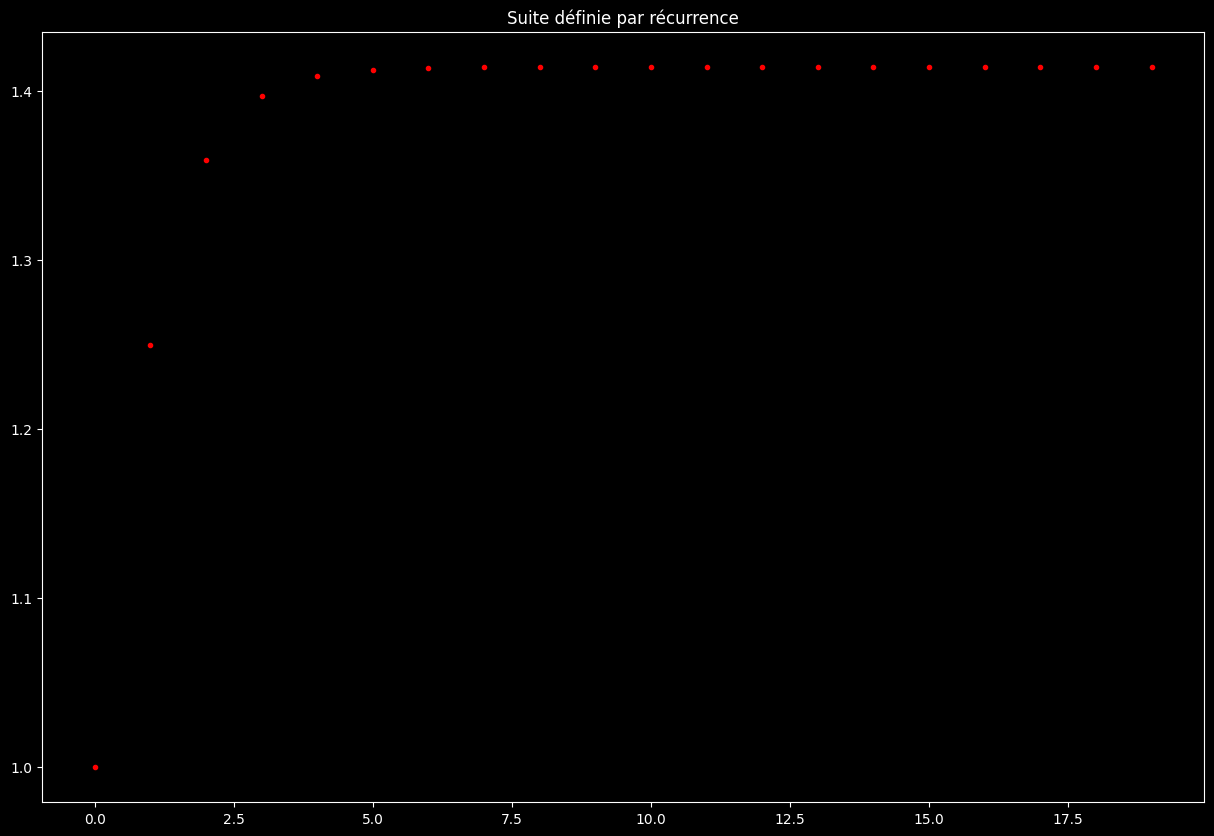

In [8]:
rg = range(0, 20)
s1 = [un(n) for n in rg]
#plt.axis([0, 20, 0, 3])

print(s1)

plt.title('Suite définie par récurrence')
plt.plot(rg, s1, 'ro', markersize=3)
plt.show()

### <tt> fonctions utiles </tt>

on se donne deux petites fonctions utiles pour visualiser les suites définie par récurrence.

 - <tt>subdivision</tt> permet de couper un intervalle $[a,b]$ en $n$ morceaux de tailles égales (à noter de numpy possède une fonction <tt>np.linespace</tt> faisant cela)
 - <tt>escalier</tt> trace $(u_n)$ selon le "diagramme escargot"

In [9]:
def subdivision(a, b, n):
    d = (b - a) / n
    return [a + k * d for k in range(n + 1)]


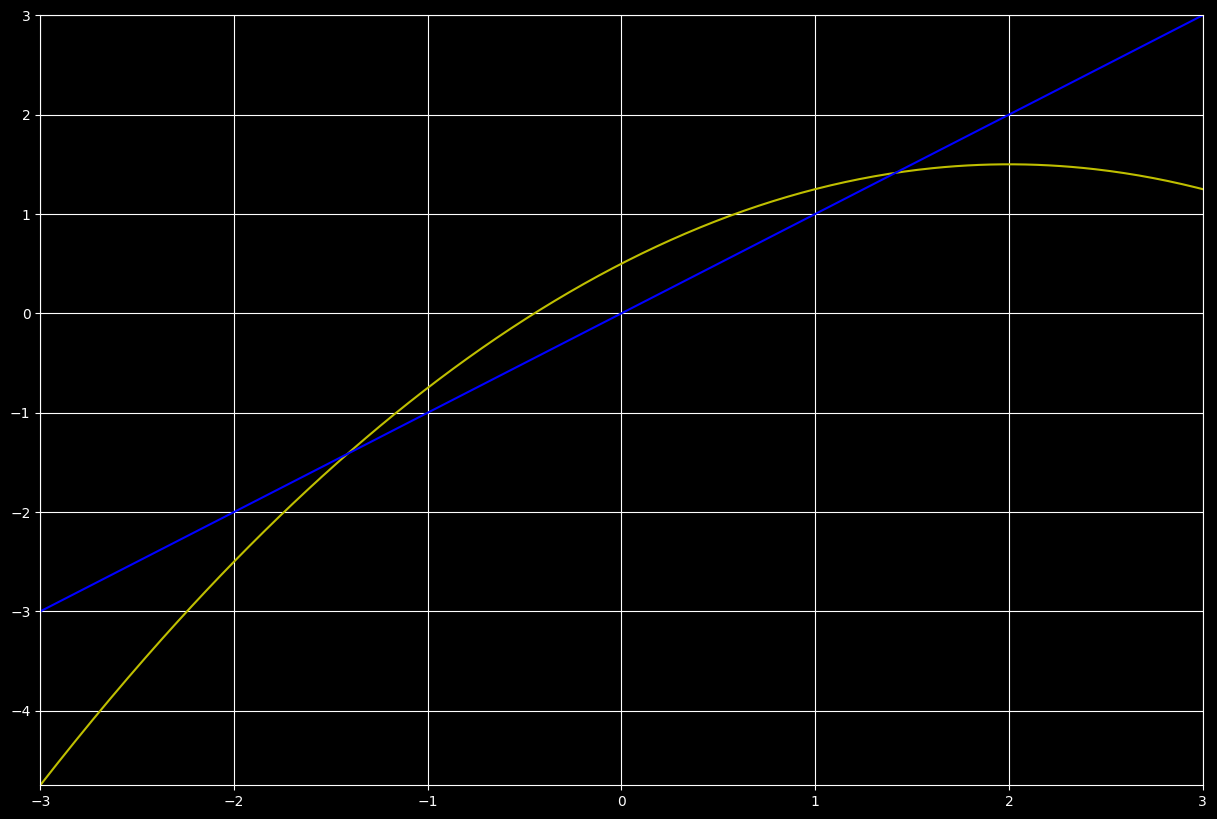

In [12]:
a=-3
b=3
xs = subdivision(a,b, 400)
plt.axis([a, b, min(a,f(a),f(b)), max(b,f(b),f(a))])
plt.plot(xs, [f(x) for x in xs], 'y')
plt.plot(xs, xs, 'b')
plt.grid()
plt.show()

In [13]:
def escalier(f, a, b, c, d, x0, n):
    xs = subdivision(a, b, 200)
    ys = [f(x) for x in xs]
    pad = 0.
    plt.axis([a - pad, b + pad, c - pad, d + pad])
    plt.plot(xs, ys, 'b')
    plt.plot(xs, xs, 'y')
    x = x0
    coul = 'r'
    plt.plot([x0, x0], [0, f(x0)], coul)
    for k in range(n):
        plt.plot([x, f(x)], [f(x), f(x)], coul)
        plt.plot([f(x), f(x)], [f(x), f(f(x))], coul)
        x = f(x)
    plt.grid()


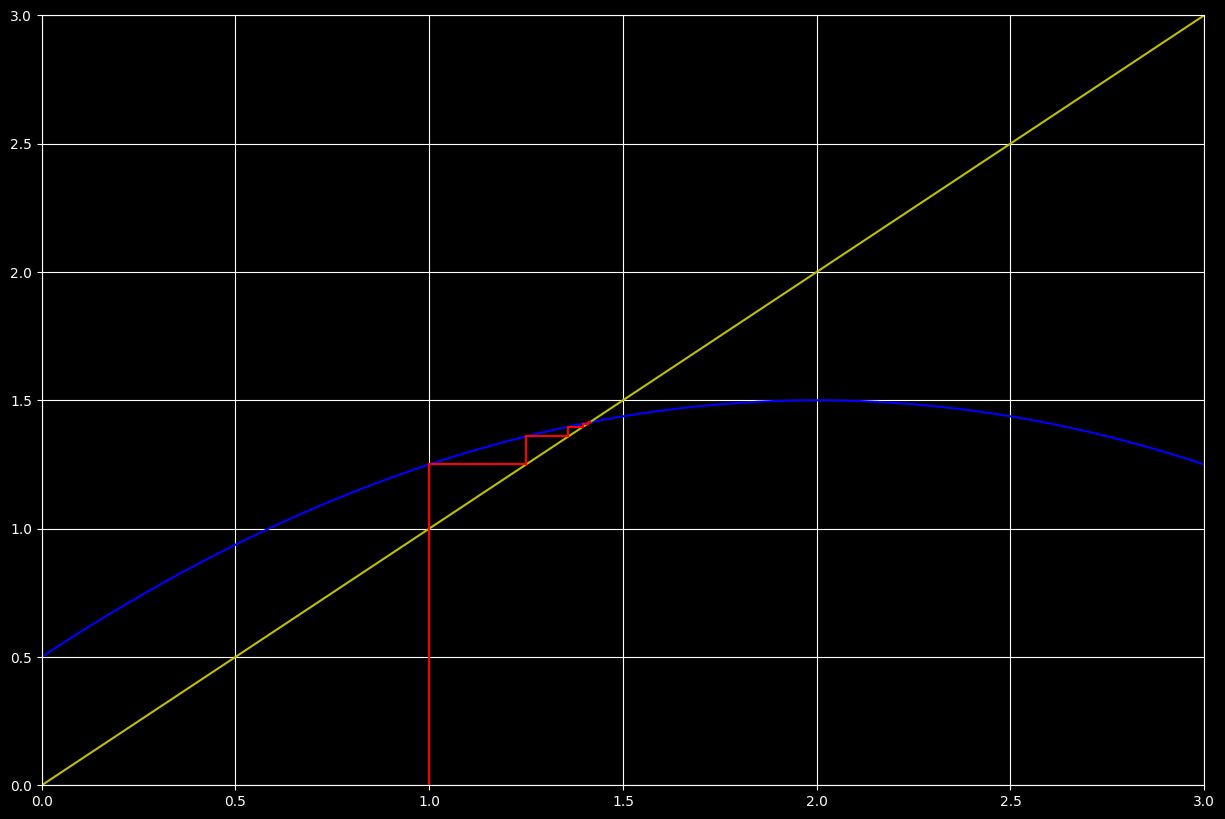

In [14]:

escalier(f, 0, 3, 0, 3, 1, 50)


**question 2** 

 - Montrer que $f$ est une fonction croissante sur $[0,2]$
 - En déduire que la suite $(u_n)_n$ est croissante






**question 3**

 - Trouver un intervalle $I$ stable par $f$
 - En déduire que la suite $(u_n)_n$ est bornée




**question 4**

 - En déduire que la suite $(u_n)_n$ convergente
 - Quelle est sa limite $\ell$ ?
 



In [15]:
print(np.sqrt(2))


1.4142135623730951


## Suite de Héron $u_{n+1} = f(u_n)$


Soit $f : \mathbb{R} \to \mathbb{R} \quad  x \mapsto \frac{x + \frac{2}{x}}{2}    $,


la suite de Héron est définie par : $(u_n)_{n \in \mathbb{N}}$ la suite définie par $u_0 = 2, u_{n+1} = f(u_n)$

**question 1**
Définir la fonction $f$ et la suite $(u_n)_n$ en python. Tracer les premiers termes et proposer des conjectures


In [17]:
def f(x):
	return (x+(2/x))/2

def un(n):
	if n == 0:
		return 2
	return f(un(n-1))

[2, 1.5, 1.4166666666666665, 1.4142156862745097, 1.4142135623746899, 1.414213562373095, 1.414213562373095, 1.414213562373095, 1.414213562373095, 1.414213562373095, 1.414213562373095, 1.414213562373095, 1.414213562373095, 1.414213562373095, 1.414213562373095, 1.414213562373095, 1.414213562373095, 1.414213562373095, 1.414213562373095, 1.414213562373095]


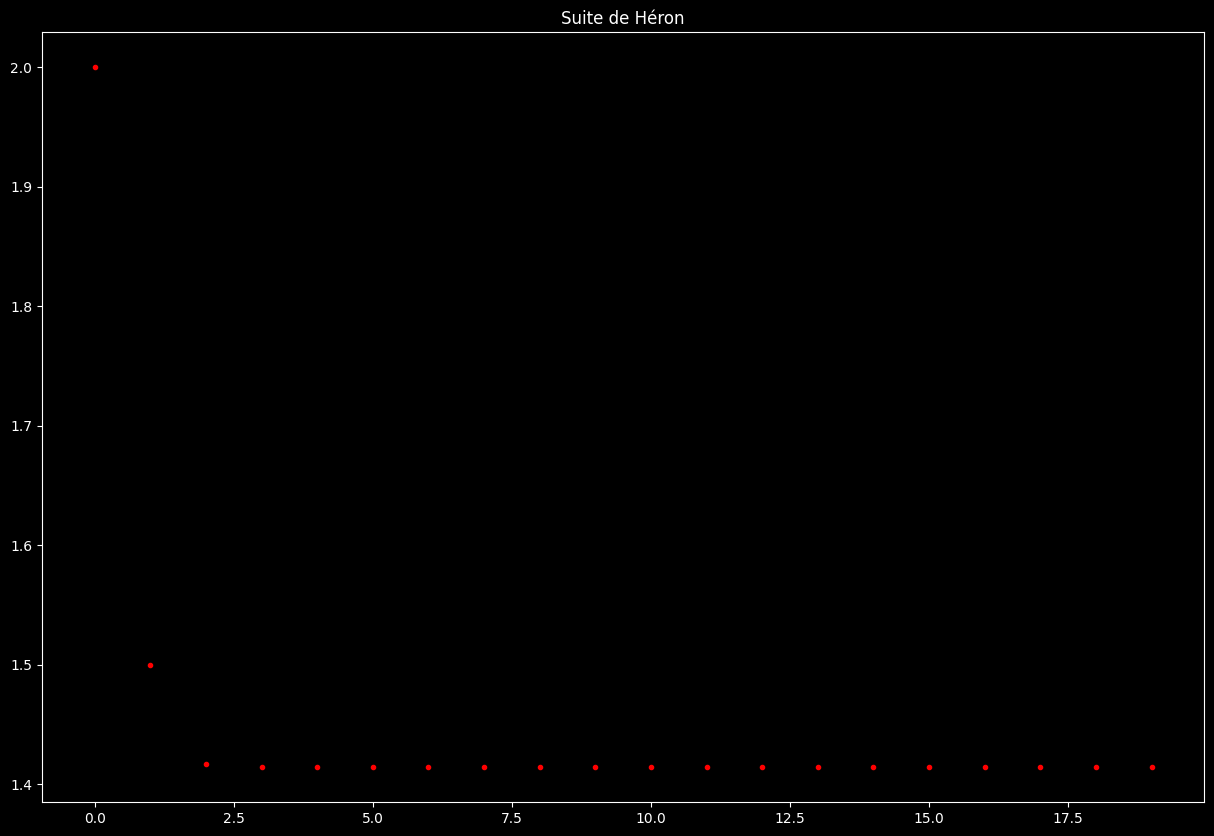

In [18]:
rg = range(0, 20)
s1 = [un(n) for n in rg]
#plt.axis([0, 20, 0, 3])

print(s1)

plt.title('Suite de Héron')
plt.plot(rg, s1, 'ro', markersize=3)
plt.show()

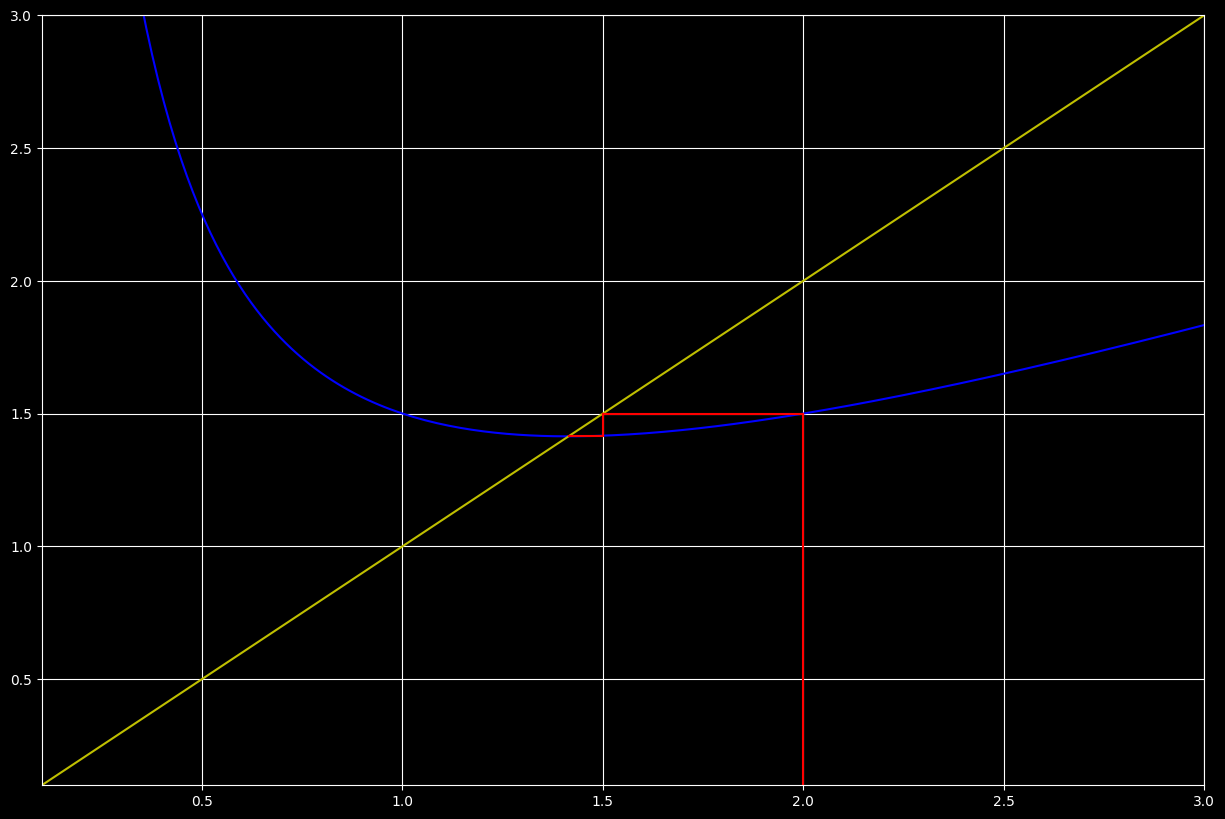

In [19]:
escalier(f, 0.1, 3, 0.1, 3, 2, 50)


**question 2** 

 - Étudier les variation de $f$
 - Trouver un intervalle $I$ stable par $f$



### suites de Héron


Conjecturer (et prouver) les limites en fonction de $A \in \mathbb{N}$ des suites $(h[A]_n)_n$ définies par 

$$ h[A]_0 = A ; h[A]_{n+1} \frac{h[A]_{n} + \frac{A}{h[A]_{n}}}{2} $$ 

*****
*****



## Point fixe et vitesse de convergence

**question 1** 

Écrire un programme <tt>contract_test</tt> qui teste empiriquement si une fonction $f$ est contractante sur un intervalle $[a,b]$ (en vérifiant si $|f(x) - f(y)| < |x-y|$ pour de nombreuses valeurs $x,y \in [a,b]$

In [22]:
def contract_test(f,a,b,k=1000):
    xs = subdivision(a, b, k)
    ys = subdivision(a, b, k)
    K=0
    for x in xs:
        for y in ys:
            if np.abs(x-y) < np.abs(f(x)-f(y)):
                return [x,y]
            else :
                if x!=y:
                    K=max(K,np.abs(f(x)-f(y))/np.abs(x-y) )
    return K
contract_test(f,9,2)


0.4876447113185758

**question 2** 

En utilisant l'inégalité des accroissement finis, montrer que $f$ est contractante.



**question 3**



Tracer la différence $d_n = \ell -u_n$. Combien d'itérations sont nécessaires pour que cette différence soit inférieure à $10^{-4}$




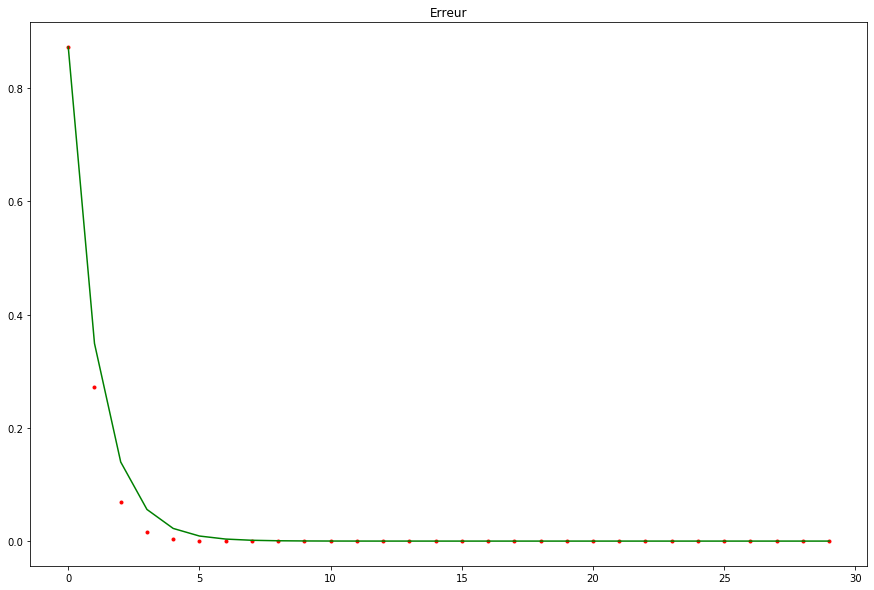